In [88]:
import numpy as np
import umap
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#sns.set(style='white', context='notebook')

In [3]:
df = pd.read_csv("../data/DoE_Data_1_4.csv", index_col=0)
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No
0,20191211_1,2019-12-11 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,15.0,NaN,NaN,NaN,No,201.000,0.004975,0.010000,False,1
1,20191211_2,2019-12-11 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,15.0,NaN,NaN,NaN,Yes,1005.000,0.004975,0.010000,False,1
2,20191211_3,2019-12-11 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,5.0,NaN,NaN,NaN,No,1005.000,0.004975,0.010000,False,1
3,20191216_2,2019-12-16 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,5.0,NaN,NaN,NaN,No,1005.000,0.004975,0.010000,False,1
4,20191216_3,2019-12-16 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,15.0,NaN,NaN,NaN,Maybe,201.000,0.004975,0.010000,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20210114_1,2021-01-14 07:30:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,7.5,0.26,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4
104,20210114_2,2021-01-14 10:00:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,10.0,1.30,22.9,24.077087,No,501.716,0.000034,0.000686,True,4
105,20210115_1,2021-01-15 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,5.0,1.10,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4
106,20210120_1,2021-01-20 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,7.5,-4.82,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4


In [4]:
df = df.dropna()

In [5]:
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No
11,20200131_1,2020-01-31 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,1.90,23.2,24.681526,Maybe,201.000,0.004975,0.010000,False,1
12,20200201_1,2020-02-01 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,1.74,23.0,24.697922,No,201.000,0.004975,0.010000,False,1
13,20200202_1,2020-02-02 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,5.0,5.30,23.1,31.548652,Yes,1005.000,0.004975,0.010000,False,1
14,20200207_1,2020-02-07 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,-1.86,23.2,18.791646,No,201.000,0.004975,0.010000,False,1
15,20200207_2,2020-02-07 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,15.0,-1.86,23.2,18.791646,Yes,1005.000,0.004975,0.010000,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20210114_1,2021-01-14 07:30:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,7.5,0.26,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4
104,20210114_2,2021-01-14 10:00:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,10.0,1.30,22.9,24.077087,No,501.716,0.000034,0.000686,True,4
105,20210115_1,2021-01-15 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,5.0,1.10,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4
106,20210120_1,2021-01-20 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,7.5,-4.82,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4


In [6]:
df = df.set_index([pd.Index(np.array(range(97)))])
df.g_pres = df['Res: Graphene Presence']

In [7]:
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),Dew Point (C),Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No
0,20200131_1,2020-01-31 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,1.90,23.2,24.681526,Maybe,201.000,0.004975,0.010000,False,1
1,20200201_1,2020-02-01 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,1.74,23.0,24.697922,No,201.000,0.004975,0.010000,False,1
2,20200202_1,2020-02-02 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,5.0,5.30,23.1,31.548652,Yes,1005.000,0.004975,0.010000,False,1
3,20200207_1,2020-02-07 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,-1.86,23.2,18.791646,No,201.000,0.004975,0.010000,False,1
4,20200207_2,2020-02-07 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,15.0,-1.86,23.2,18.791646,Yes,1005.000,0.004975,0.010000,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,20210114_1,2021-01-14 07:30:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,7.5,0.26,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4
93,20210114_2,2021-01-14 10:00:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,10.0,1.30,22.9,24.077087,No,501.716,0.000034,0.000686,True,4
94,20210115_1,2021-01-15 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,5.0,1.10,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4
95,20210120_1,2021-01-20 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,7.5,-4.82,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4


In [8]:
#df.insert(13, 'Graphene Grade', )

In [9]:
df.g_pres.value_counts()

No       52
Yes      34
Maybe    11
Name: Res: Graphene Presence, dtype: int64

In [10]:
#sns.pairplot(df, hue='Graphene Grade')

# UMAP vs t-SNE

In [11]:
reducer = umap.UMAP()

In [12]:
df_data = df.iloc[:,2:13].values
scaled_df_data = StandardScaler().fit_transform(df_data)

In [13]:
#print('df data: \n', df_data)
#print('\n \n scaled df data: \n', scaled_df_data)

In [14]:
scaled_df_data.shape

(97, 11)

In [15]:
embedding = reducer.fit_transform(scaled_df_data)
embedding.shape

(97, 2)

In [16]:
#embedding
#(np.unique(df.g_pres))[0:3]

In [17]:
#plt.scatter(
#    embedding[:, 0],
#    embedding[:, 1],
#    c=df['Graphene Presence'])
#plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of the DoE Set', fontsize=18)
#plt.legend(('Maybe', 'Yes', 'No'))

In [18]:
df['umap_x'] = embedding[:, 0]
df['umap_y'] = embedding[:, 1]
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),...,Temperature (C),Relative Humidity (pct),Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,umap_x,umap_y
0,20200131_1,2020-01-31 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,23.2,24.681526,Maybe,201.000,0.004975,0.010000,False,1,9.928305,6.011945
1,20200201_1,2020-02-01 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,23.0,24.697922,No,201.000,0.004975,0.010000,False,1,10.120639,6.190449
2,20200202_1,2020-02-02 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,5.0,...,23.1,31.548652,Yes,1005.000,0.004975,0.010000,False,1,3.121825,5.399772
3,20200207_1,2020-02-07 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,23.2,18.791646,No,201.000,0.004975,0.010000,False,1,10.190801,6.047469
4,20200207_2,2020-02-07 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,15.0,...,23.2,18.791646,Yes,1005.000,0.004975,0.010000,False,1,2.905013,5.389802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,20210114_1,2021-01-14 07:30:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,7.5,...,21.7,24.030716,Maybe,501.716,0.000034,0.000686,True,4,18.216038,3.369635
93,20210114_2,2021-01-14 10:00:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,10.0,...,22.9,24.077087,No,501.716,0.000034,0.000686,True,4,18.367266,3.190497
94,20210115_1,2021-01-15 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,5.0,...,22.0,25.068069,No,1003.432,0.000034,0.000686,True,4,18.380146,1.469842
95,20210120_1,2021-01-20 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,7.5,...,22.0,16.209052,No,1003.432,0.000034,0.000686,True,4,18.255905,1.907683


In [19]:
X_embedded = TSNE(n_components=2).fit_transform(scaled_df_data)
X_embedded.shape

(97, 2)

In [20]:
df['tsne_x'] = X_embedded[:, 0]
df['tsne_y'] = X_embedded[:, 1]
df

,ID,datetime,Annealing H2 (sccm),Growth H2 (sccm),Growth CH4 (sccm),Growth He (sccm),Cooling H2 (sccm),Cooling CH4 (sccm),Cooling He (sccm),Growth Time (min),...,Res: Graphene Presence,CP: Total Flow Rate (sccm),CP: CH4/Total,CP: CH4/H2,CP: Dil CH4,CP: Set No,umap_x,umap_y,tsne_x,tsne_y
0,20200131_1,2020-01-31 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,Maybe,201.000,0.004975,0.010000,False,1,9.928305,6.011945,0.075224,-1.542658
1,20200201_1,2020-02-01 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,No,201.000,0.004975,0.010000,False,1,10.120639,6.190449,0.201699,-1.584402
2,20200202_1,2020-02-02 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,5.0,...,Yes,1005.000,0.004975,0.010000,False,1,3.121825,5.399772,-6.172108,0.282946
3,20200207_1,2020-02-07 00:00:00,100.0,100.0,1.00000,100.00000,0,0.00000,100.00000,5.0,...,No,201.000,0.004975,0.010000,False,1,10.190801,6.047469,0.609377,-2.105063
4,20200207_2,2020-02-07 00:00:00,500.0,500.0,5.00000,500.00000,0,0.00000,500.00000,15.0,...,Yes,1005.000,0.004975,0.010000,False,1,2.905013,5.389802,-6.448948,0.883977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,20210114_1,2021-01-14 07:30:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,7.5,...,Maybe,501.716,0.000034,0.000686,True,4,18.216038,3.369635,5.930018,2.839025
93,20210114_2,2021-01-14 10:00:00,50.0,25.0,0.01716,476.69884,25,0.01716,476.69884,10.0,...,No,501.716,0.000034,0.000686,True,4,18.367266,3.190497,5.526183,2.428305
94,20210115_1,2021-01-15 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,5.0,...,No,1003.432,0.000034,0.000686,True,4,18.380146,1.469842,7.719754,0.810495
95,20210120_1,2021-01-20 09:00:00,50.0,50.0,0.03432,953.39768,50,0.03432,953.39768,7.5,...,No,1003.432,0.000034,0.000686,True,4,18.255905,1.907683,8.024820,1.590927


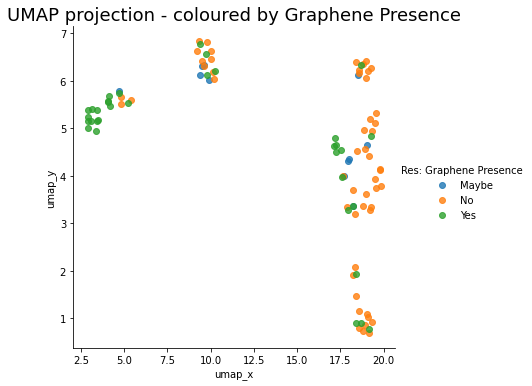

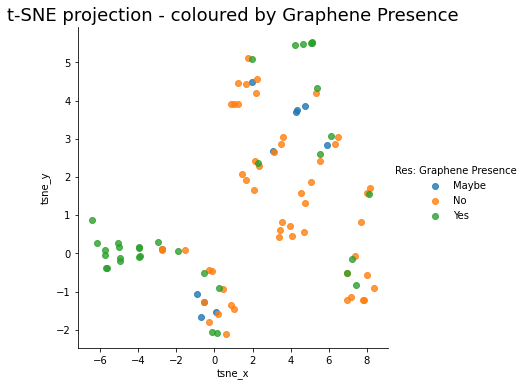

In [21]:
sns.lmplot('umap_x', 'umap_y', data=df, hue='Res: Graphene Presence', fit_reg=False)
plt.title('UMAP projection - coloured by Graphene Presence', fontsize=18)
sns.lmplot('tsne_x', 'tsne_y', data=df, hue='Res: Graphene Presence', fit_reg=False)
plt.title('t-SNE projection - coloured by Graphene Presence', fontsize=18)
plt.show()

In [22]:
#plt.scatter(df['umap_x'],df['umap_y'], c=df['CP: Total Flow Rate (sccm)'])
#plt.colorbar()
#plt.show()

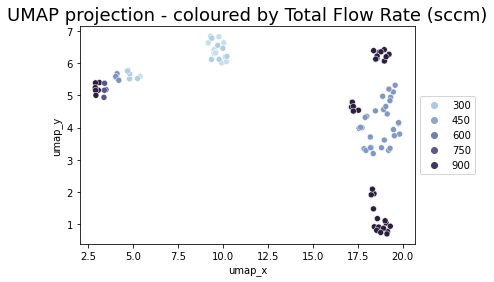

In [23]:
g1 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: Total Flow Rate (sccm)', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g1.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by Total Flow Rate (sccm)', fontsize=18)
plt.show()

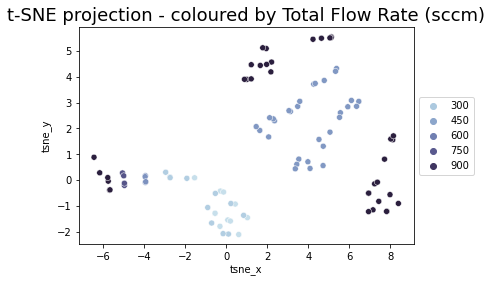

In [24]:
g1t = sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='CP: Total Flow Rate (sccm)', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g1t.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('t-SNE projection - coloured by Total Flow Rate (sccm)', fontsize=18)
plt.show()

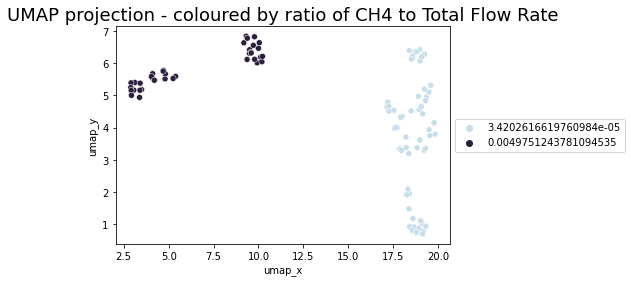

In [25]:
g2 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: CH4/Total', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g2.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by ratio of CH4 to Total Flow Rate', fontsize=18)
plt.show()

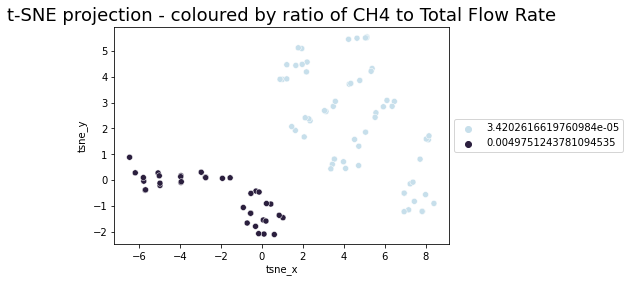

In [26]:
g2t = sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='CP: CH4/Total', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g2t.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('t-SNE projection - coloured by ratio of CH4 to Total Flow Rate', fontsize=18)
plt.show()

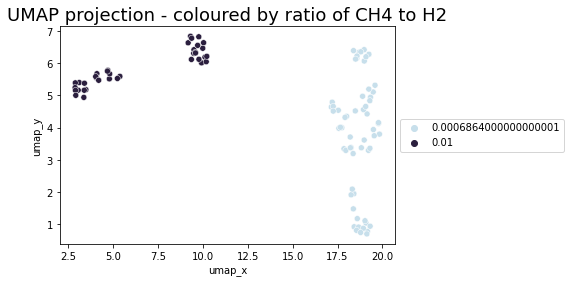

In [27]:
g3 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: CH4/H2', palette=sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True))
g3.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by ratio of CH4 to H2', fontsize=18)
plt.show()

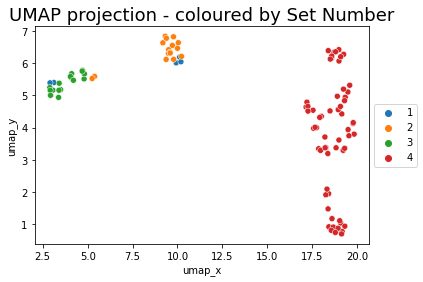

In [28]:
g4 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: Set No', palette=sns.color_palette()[0:4])
g4.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by Set Number', fontsize=18)
plt.show()

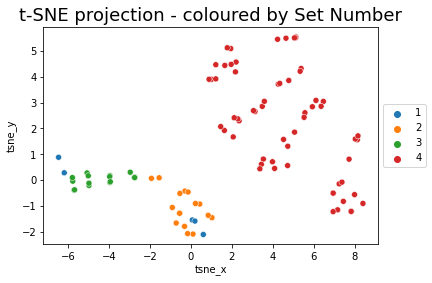

In [29]:
g4t = sns.scatterplot(data=df, x='tsne_x', y='tsne_y', hue='CP: Set No', palette=sns.color_palette()[0:4])
g4t.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('t-SNE projection - coloured by Set Number', fontsize=18)
plt.show()

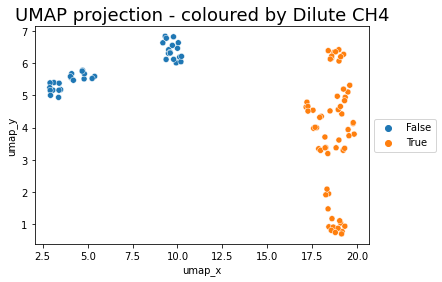

In [30]:
g5 = sns.scatterplot(data=df, x='umap_x', y='umap_y', hue='CP: Dil CH4')
g5.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.title('UMAP projection - coloured by Dilute CH4', fontsize=18)
plt.show()

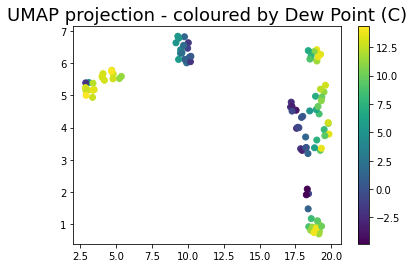

In [31]:
plt.scatter(df['umap_x'],df['umap_y'], c=df['Dew Point (C)'])
plt.colorbar()
plt.title('UMAP projection - coloured by Dew Point (C)', fontsize=18)
plt.show()

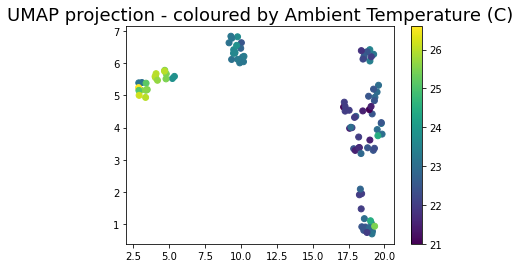

In [32]:
plt.scatter(df['umap_x'],df['umap_y'], c=df['Temperature (C)'])
plt.colorbar()
plt.title('UMAP projection - coloured by Ambient Temperature (C)', fontsize=18)
plt.show()

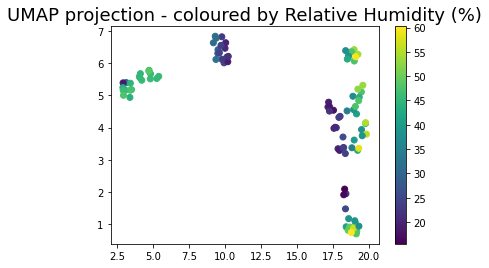

In [33]:
plt.scatter(df['umap_x'],df['umap_y'], c=df['Relative Humidity (pct)'])
plt.colorbar()
plt.title('UMAP projection - coloured by Relative Humidity (%)', fontsize=18)
plt.show()

# UMAP - new
- One excluded
- All included
- 'Maybe' graded as 'Yes' and 'No'

In [34]:
dfnew = df.iloc[:,:-4]

In [35]:
def f_neutral(val):
    if val == 'Yes':
        return 1
    elif val == 'No':
        return 0
    elif val == 'Maybe':
        return 0.5
    
def f_positive(val):
    if val == 'Yes':
        return 1
    elif val == 'No':
        return 0
    elif val == 'Maybe':
        return 1

def f_negative(val):
    if val == 'Yes':
        return 1
    elif val == 'No':
        return 0
    elif val == 'Maybe':
        return 0

In [36]:
dfnew['Res: Neutral Grade'] = dfnew['Res: Graphene Presence'].apply(f_neutral)
dfnew['Res: Positive Grade'] = dfnew['Res: Graphene Presence'].apply(f_positive)
dfnew['Res: Negative Grade'] = dfnew['Res: Graphene Presence'].apply(f_negative)

dfnew.shape

(97, 22)

In [37]:
#df_data = df.iloc[:,2:13].values
#scaled_df_data = StandardScaler().fit_transform(df_data)

dfnew_neutral_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -3]]
dfnew_positive_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -2]]
dfnew_negative_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -1]]

#scaled_dfnew_neutral_data = StandardScaler().fit_transform(dfnew_neutral_data)
#scaled_dfnew_positive_data = StandardScaler().fit_transform(dfnew_positive_data)
#scaled_dfnew_negative_data = StandardScaler().fit_transform(dfnew_negative_data)

In [38]:
def umap_one_excl(df_data, df, col_name, drop_name=['Relative Humidity (pct)','CP: Total Flow Rate (sccm)','CP: CH4/Total','CP: CH4/H2','CP: Dil CH4','CP: Set No']):
    df_data_func = df_data.drop([col_name]+drop_name, axis=1)
    #print(df_data_func.head())
    print('df_data_func shape',df_data_func.shape)
    df_func = df.copy()
    print('df_func shape',df_func.shape)
    print('df shape',df.shape)
    reducer = umap.UMAP()
    scaled_df_data = StandardScaler().fit_transform(df_data_func)
    embedding = reducer.fit_transform(scaled_df_data)
    print('embedding shape',embedding.shape)
    df_func['umap_x'] = embedding[:, 0]
    df_func['umap_y'] = embedding[:, 1]
    plt.figure(figsize=(8,6))
    plt.scatter(df_func['umap_x'],df_func['umap_y'], c=df_func[col_name])
    #plt.rcParams['font.size'] = '12'
    plt.colorbar()
    plt.title('UMAP projection (excluding coloured paramater) - coloured by %s'%col_name, fontsize=18)
    plt.show()

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


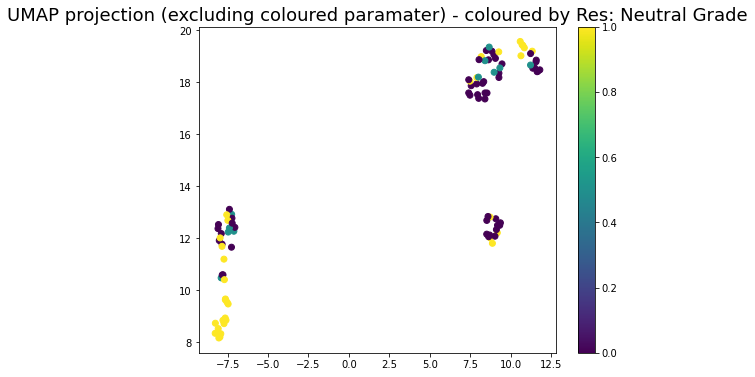

In [39]:
umap_one_excl(dfnew_neutral_data, dfnew, 'Res: Neutral Grade')

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


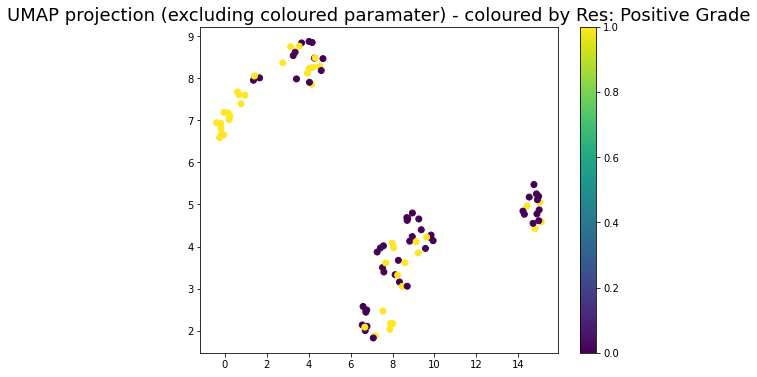

In [40]:
umap_one_excl(dfnew_positive_data, dfnew, 'Res: Positive Grade')

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


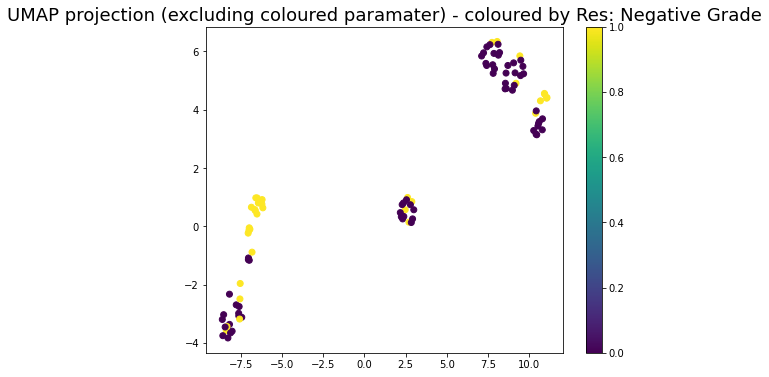

In [41]:
umap_one_excl(dfnew_negative_data, dfnew, 'Res: Negative Grade')

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


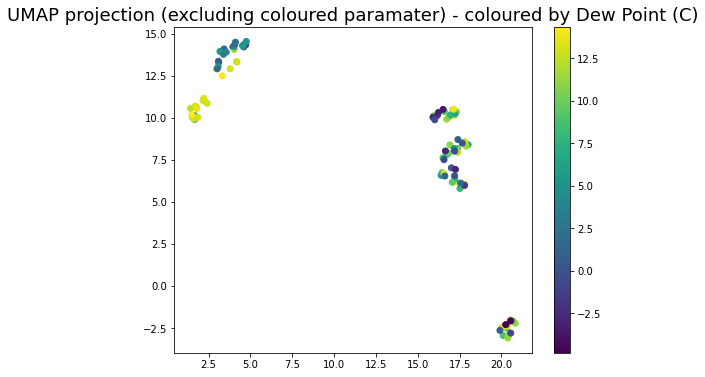

In [42]:
umap_one_excl(dfnew_neutral_data, dfnew, 'Dew Point (C)')

In [43]:
def umap_incl(df_data, df, col_name, drop_name=['Relative Humidity (pct)','CP: Total Flow Rate (sccm)','CP: CH4/Total','CP: CH4/H2','CP: Dil CH4','CP: Set No']):
    df_data_func = df_data.drop(drop_name, axis=1)
    #print(df_data_func.head())
    print('df_data_func shape',df_data_func.shape)
    df_func = df.copy()
    print('df_func shape',df_func.shape)
    print('df shape',df.shape)
    reducer = umap.UMAP()
    scaled_df_data = StandardScaler().fit_transform(df_data_func)
    embedding = reducer.fit_transform(scaled_df_data)
    print('embedding shape',embedding.shape)
    df_func['umap_x'] = embedding[:, 0]
    df_func['umap_y'] = embedding[:, 1]
    plt.figure(figsize=(8,6))
    plt.scatter(df_func['umap_x'],df_func['umap_y'], c=df_func[col_name])
    plt.colorbar()
    plt.title('UMAP projection (all inclusive) - coloured by %s'%col_name, fontsize=18)
    plt.show()

df_data_func shape (97, 11)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


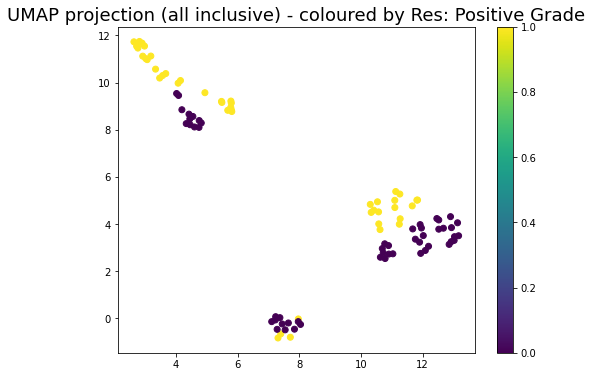

In [44]:
umap_incl(dfnew_positive_data, dfnew, 'Res: Positive Grade')

df_data_func shape (97, 11)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


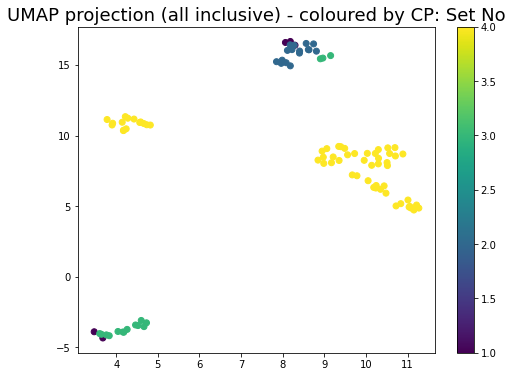

In [45]:
umap_incl(dfnew_negative_data, dfnew, 'CP: Set No')

df_data_func shape (97, 11)
df_func shape (97, 22)
df shape (97, 22)
embedding shape (97, 2)


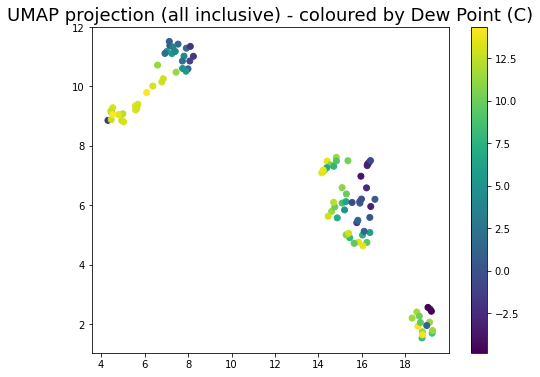

In [46]:
umap_incl(dfnew_neutral_data, dfnew, 'Dew Point (C)')

# PCA

In [47]:
dfnew.shape

(97, 22)

In [48]:
dfpca_neutral_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -3]]
dfpca_positive_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -2]]
dfpca_negative_data = dfnew.iloc[:, pd.np.r_[2:13, 14:19, -1]]

In [114]:
def pca_one_excl(df_data, df, col_name, drop_name=['Relative Humidity (pct)','CP: Total Flow Rate (sccm)','CP: CH4/Total','CP: CH4/H2','CP: Dil CH4','CP: Set No'], components=2):
    df_data_func = (df_data.drop([col_name]+drop_name, axis=1))
    #print(df_data_func.head())
    print('df_data_func shape',df_data_func.shape)
    df_func = df.copy()
    print('df_func shape',df_func.shape)
    print('df shape',df.shape)
    
    scaled_df_data = StandardScaler().fit_transform(df_data_func)
    
    pca = PCA(n_components=components)
    principalComponents = pca.fit_transform(scaled_df_data)
    
    principalDf_columns = []
    for i in range(components):
        principalDf_columns.append('principal component %i' %(i+1))
    
    principalDf = pd.DataFrame(data = principalComponents
             , columns = principalDf_columns)
    
    plt.figure(figsize=(8,6))
    plt.scatter(principalDf['principal component 1'],principalDf['principal component 2'], c=df_func[col_name])
    plt.colorbar()
    #plt.title('UMAP projection (excluding coloured paramater) - coloured by %s'%col_name, fontsize=18)
    plt.show()
    print('\nPCA Components Size: ', pca.components_.shape)
    print('\nPrincipal Component Names: ', df_data_func.columns)
    print('\nPrincipal Components:')
    for i in range(components):
        print('\n%i: ' %(i+1), pca.components_[i])
    print('\nExplained Variance:', pca.explained_variance_)
    print('\nExplained Variance Ratio:', pca.explained_variance_ratio_)
    print('\nSingular Values:', pca.singular_values_)

In [117]:
print('a')
type(dfpca_neutral_data.columns)
#print('b')

a


pandas.core.indexes.base.Index

df_data_func shape (97, 10)
df_func shape (97, 22)
df shape (97, 22)


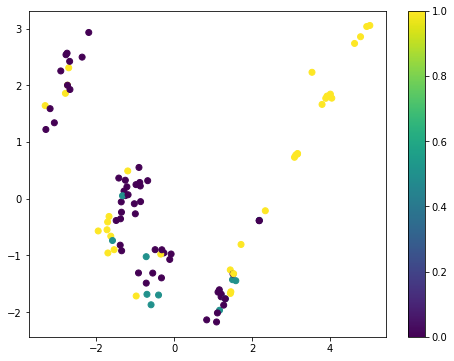


PCA Components Size:  (10, 10)

Principal Component Names:  Index(['Annealing H2 (sccm)', 'Growth H2 (sccm)', 'Growth CH4 (sccm)',
       'Growth He (sccm)', 'Cooling H2 (sccm)', 'Cooling CH4 (sccm)',
       'Cooling He (sccm)', 'Growth Time (min)', 'Dew Point (C)',
       'Temperature (C)'],
      dtype='object')

Principal Components:

1:  [ 0.39411322  0.39143064  0.41256949 -0.31413403 -0.30434983 -0.30434983
 -0.31422682 -0.07618898  0.11943027  0.34423621]

2:  [0.29793562 0.30862382 0.25362446 0.37535314 0.36675782 0.36675782
 0.37667561 0.1633077  0.32238452 0.26317686]

3:  [ 0.16410784  0.15910016  0.12696701  0.22636307 -0.26388054 -0.26388054
  0.2251692   0.65240694 -0.43064826 -0.2816649 ]

4:  [-0.10623229 -0.0982293  -0.13446698  0.3477475  -0.44248067 -0.44248067
  0.34523505 -0.14634638  0.55451123  0.01976166]

5:  [ 0.17728744  0.19854141  0.16162163  0.25484011 -0.03491022 -0.03491022
  0.25457982 -0.72121586 -0.44808424 -0.22339494]

6:  [-0.19529993 -0.12888626 

In [115]:
pca_one_excl(dfpca_neutral_data, dfnew, 'Res: Neutral Grade', components=10)